# Project Topic: Understanding factors that affects employee attrition


# Setting the environment by Importing libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the dataset

In [2]:
df = pd.read_csv("employeeAttrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#dropping the columns that are not needed
new_df = df.drop([ 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours','WorkLifeBalance', 'StockOptionLevel', 'YearsInCurrentRole','DailyRate', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,5993,19479,8,Yes,11,3,1,8,0,6
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,5130,24907,1,No,23,4,4,10,3,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,2090,2396,6,Yes,15,3,2,7,3,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,2909,23159,1,Yes,11,3,3,8,3,8
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3468,16632,9,No,12,3,4,6,3,2


In [4]:
# Adding new column 'AgeRange'
age_ranges = ["{0} - {1}".format(age, age + 10) for age in range(10, 60, 10)]
age_ranges
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges
new_df['AgeRange'] = pd.cut(x=new_df['Age'], bins=count_unique_age_ranges, labels=age_ranges)
new_df.head(15)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,AgeRange
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,19479,8,Yes,11,3,1,8,0,6,30 - 40
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,24907,1,No,23,4,4,10,3,10,40 - 50
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,2396,6,Yes,15,3,2,7,3,0,30 - 40
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,23159,1,Yes,11,3,3,8,3,8,20 - 30
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,16632,9,No,12,3,4,6,3,2,20 - 30
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,4,Male,3,...,11864,0,No,13,3,3,8,2,7,20 - 30
6,59,No,Travel_Rarely,Research & Development,3,3,Medical,3,Female,4,...,9964,4,Yes,20,4,1,12,3,1,50 - 60
7,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,4,Male,3,...,13335,1,No,22,4,2,1,2,1,20 - 30
8,38,No,Travel_Frequently,Research & Development,23,3,Life Sciences,4,Male,2,...,8787,0,No,21,4,2,10,2,9,30 - 40
9,36,No,Travel_Rarely,Research & Development,27,3,Medical,3,Male,3,...,16577,6,No,13,3,2,17,3,7,30 - 40


In [5]:
#group by AgeRange
group_df= new_df.groupby(['AgeRange']).count()
group_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
AgeRange,,,,,,,,,,,,,,,,,,,,,
10 - 20,162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
20 - 30,489,489,489,489,489,489,489,489,489,489,...,489,489,489,489,489,489,489,489,489,489
30 - 40,472,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
40 - 50,223,223,223,223,223,223,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
50 - 60,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124


# Question: How does age and gender affect employee attrition, does it has anything to tell/hint us about our health?

NameError: name 'AgeRangeFrequecy' is not defined

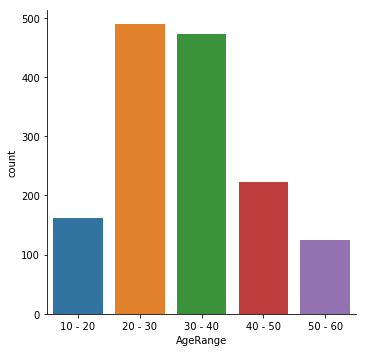

In [6]:
#showing the frequency of age range
AgeRangeFrequency = sns.catplot(x='AgeRange',data=new_df, kind='count', ci=None)
AgeRangeFrequecy.fig.suptitle('This table shows the Frequency of Age', y= 1.03)


Text(0.5, 1.03, 'This table shows the AgeRange that has the highest Yes and Higest No level of Attrition')

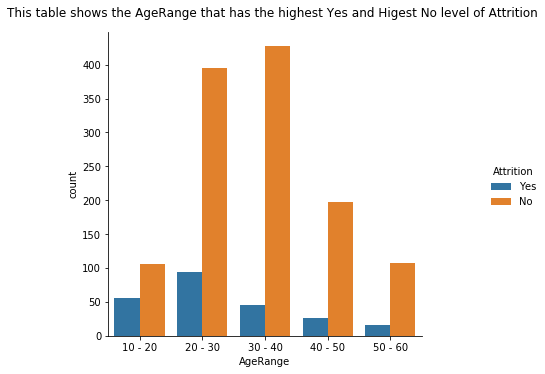

In [7]:
# Age range with the highest value where attrition is Yes and No
HighestAttrition= sns.catplot(x='AgeRange',data=new_df, ci = None, kind= 'count', hue='Attrition')
HighestAttrition.fig.suptitle('This table shows the AgeRange that has the highest Yes and Higest No level of Attrition', y= 1.03)


Text(0.5, 1.05, 'This table shows the level of attrition based on Gender and Age Range')

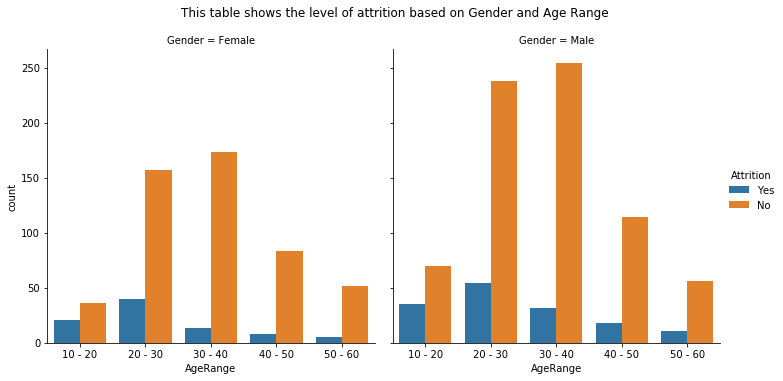

In [52]:
hg=sns.catplot(x='AgeRange',col='Gender',data=new_df, ci = None, kind= 'count', hue='Attrition')
hg.fig.suptitle('This table shows the level of attrition based on Gender and Age Range', y= 1.05)

# Question: How does work performance rating  affect employee attrition, In what way does level of education enhance work performance rating (positively/negatively) and how does it affect employee attrition

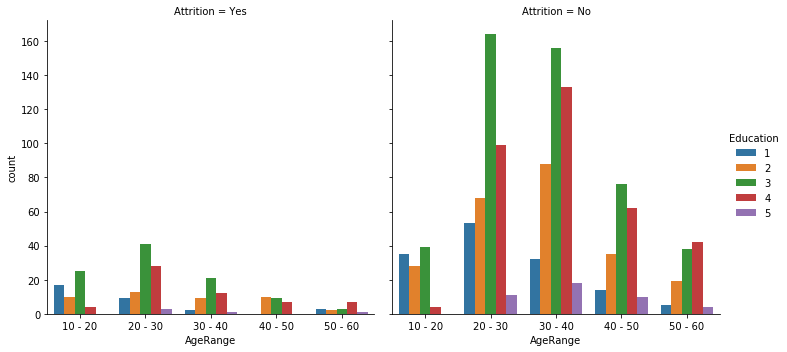

In [8]:
#This table shows the effect of education on employee attrition
sns.catplot(x='AgeRange',col='Attrition', data= new_df, kind= 'count', hue='Education')



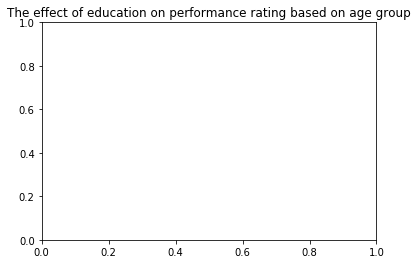

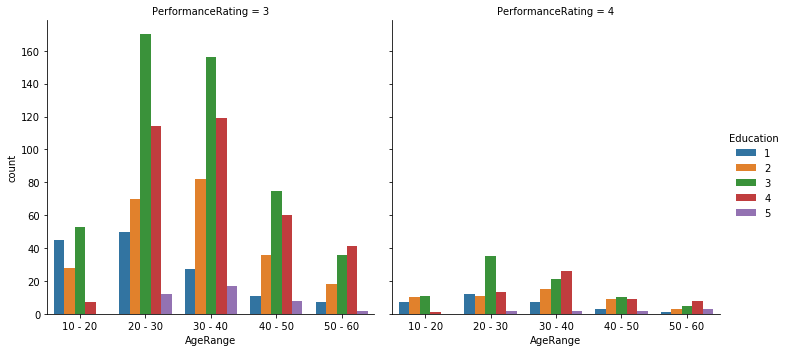

In [37]:
#this table shows how education affects Performance Rating
plt.title('The effect of education on performance rating based on age group')
sns.catplot(x='AgeRange',col='PerformanceRating', data= new_df, kind= 'count', hue='Education')

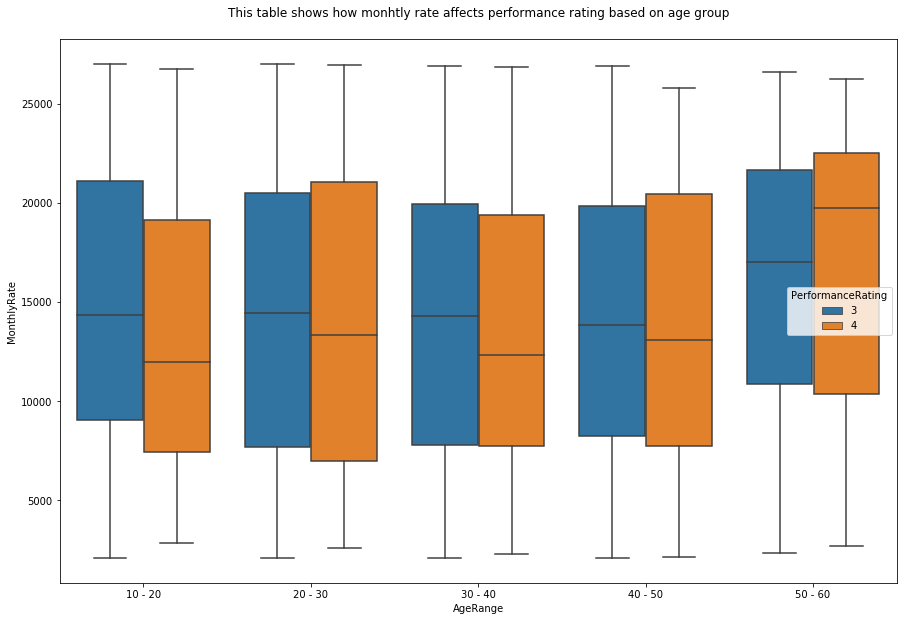

In [31]:
#this plot is supposed to depict how monthly rate affects Performance rating using Age Range

plt.figure(figsize=(15,10))
plt.title('This table shows how monhtly rate affects performance rating based on age group', y = 1.03)
sns.boxplot(x='AgeRange',y='MonthlyRate', data= new_df, hue='PerformanceRating')

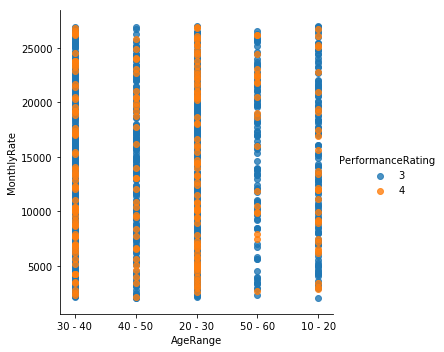

In [12]:
#this plot is supposed to depict how monthly rate affects Performance rating using Age Range
sns.lmplot(x='AgeRange', y='MonthlyRate', data=new_df,
           fit_reg=False, # No regression line
           hue='PerformanceRating')   # Color by evolution stage

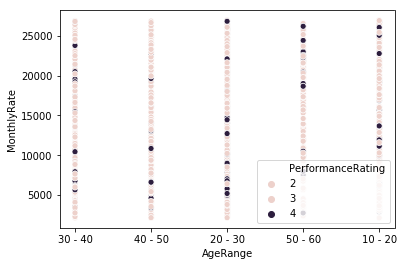

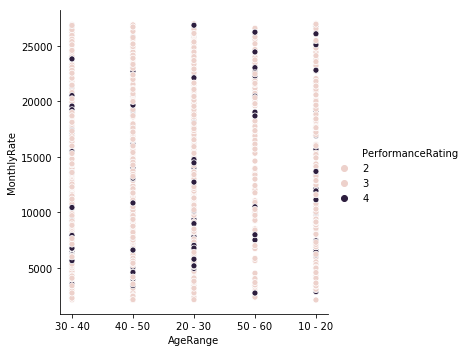

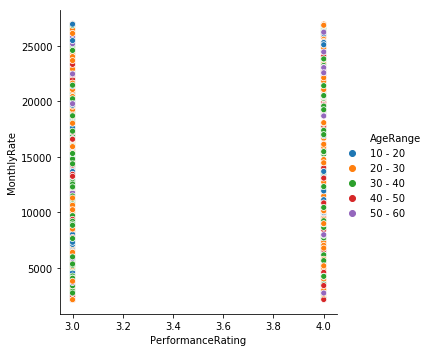

In [16]:
#this plot is supposed to depict how monthly rate affects Performance rating using Age Range
sns.scatterplot(x='AgeRange', y='MonthlyRate', data=new_df, hue= 'PerformanceRating')
sns.relplot(x='AgeRange', y='MonthlyRate', data=new_df, hue= 'PerformanceRating')
sns.relplot(x='PerformanceRating', y='MonthlyRate', data=new_df, hue= 'AgeRange')

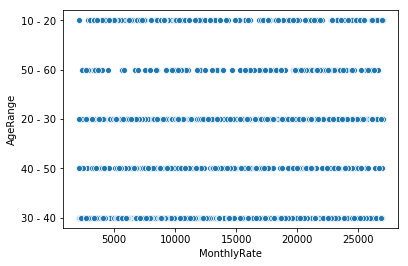

In [65]:
sns.scatterplot(x='MonthlyRate',y='AgeRange',data=new_df)

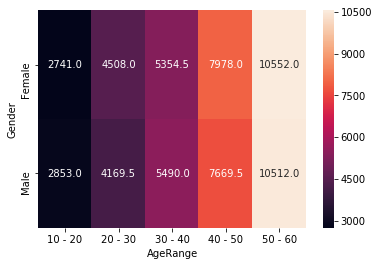

In [66]:
#sns.catplot(x='PerformanceRating',y='DistanceFromHome',hue='Attrition',data=new_df kind= 'box')
df = new_df.pivot_table(index='Gender', columns='AgeRange', values='MonthlyIncome', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

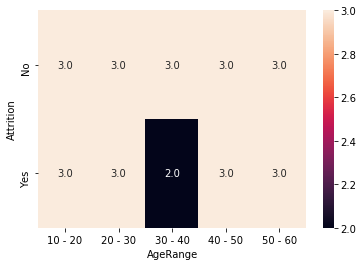

In [68]:
heat_df = new_df.pivot_table(index='Attrition', columns='AgeRange', values='JobSatisfaction', aggfunc=np.median)
sns.heatmap(heat_df, annot=True, fmt=".1f")
plt.show()